<a href="https://colab.research.google.com/github/shairatabassum/MachineLearning_python/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression Algorithm**

This algorithm is called Linear Regression because it approximates or predicts data with a linear function.

**Approximation line equation:** $\hat{y} = wx + b$

**Cost Function:** MSE (Mean Square Error) to find the values of weight $w$ and bias $b$. 

$ MSE = J(w, b) = \frac{1}{N}\ $$\sum^{n}_{i=1}$$ (y_i - (wx_i + b))^2 $

The goal is to minimize the error as much as possible which requires to find the minimum of this function. Thus, the derivative of the gradient is calculated in order to find the minimum of the cost function. Using these calculated derivatives or gradients, an iterative method is applied named **Gradient Descent** to get to the minimum of $J(w)$.

Using the cost function with an initialization of weight and bias, it goes towards the direction of the steepest descent. This process is done iteratively until the minimum error is reached. However, the weight and bias are updated after each iteration.

**Update Rules:**
* $ w = w - \alpha \times dw $
* $ b = b - \alpha \times db $
* $ \frac{dJ}{dw}\ = dw = \frac{1}{N}\ $$\sum^{n}_{i=1}$$ - 2x_i (y_i - (wx_i + b)) = \frac{1}{N}\ $$\sum^{n}_{i=1}$$ 2x_i(\hat{y} - y_i) $
* $ \frac{dJ}{db}\ = db = \frac{1}{N}\ $$\sum^{n}_{i=1}$$ - 2 (y_i - (wx_i + b)) = \frac{1}{N}\ $$\sum^{n}_{i=1}$$ 2(\hat{y} - y_i) $

Here, the $\alpha$ is called **Learning Rate** which defines how far the steps should be taken towards the direction of the steepest descent in each iteration. If the learning rate is small, it may take longer but it can finally reach to the minimum. On the otherhand, if the learning rate is big, then it might be faster but it will jump around and never find the minimum. Thus, the learning rate is an important parameter that need to be specified to achieve the goal.

**Best Fit Line in Linear Regression:**
Linear Regression is the process of finding a line that best fits the data points available on the plot, so that it can be used to predict output values for given inputs. So, a line of best fit is a straight line that represents the best approximation of a scatter plot of data points.

### **Import Dataset**

In [22]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

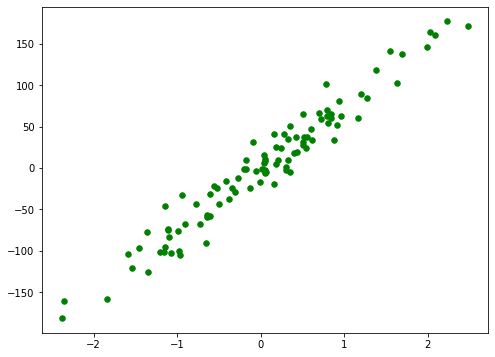

In [23]:
# generate example dataset
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# plot data samples
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color='g', s=30)
plt.show()

In [24]:
print(X_train.shape)
print(y_train.shape)

(80, 1)
(80,)


### **Linear Regression from scratch**

In [25]:
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

In [28]:
class LinearRegressionModel:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

In [29]:
# train the model
regressor = LinearRegressionModel(learning_rate=0.01, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

In [30]:
# model evaluation
def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

mse = mean_squared_error(y_test, predictions)
print('MSE:', round(mse, 2))

accuracy = r2_score(y_test, predictions)*100
print('Accuracy:', round(accuracy,2), '%')

MSE: 305.77
Accuracy: 92.54 %


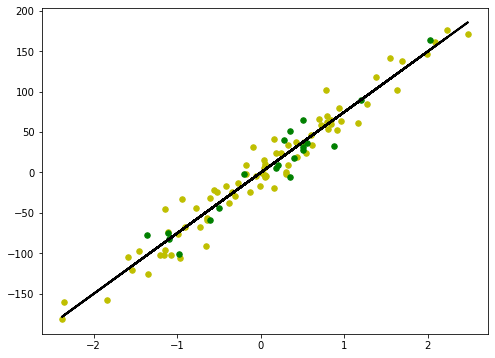

In [31]:
# best fit line visualization
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color='y', s=30)
m2 = plt.scatter(X_test, y_test, color='g', marker='o', s=30)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.show()

### **Linear Regression using scikit-learn**

In [32]:
reg = LinearRegression()
reg.fit(X_train, y_train)

prediction = reg.predict(X_test)
mse = mean_squared_error(y_test, prediction)
print('MSE:', round(mse, 2))

accuracy = reg.score(X_test,y_test)
print('Accuracy:', round(accuracy*100, 2), '%')

MSE: 305.77
Accuracy: 92.48 %


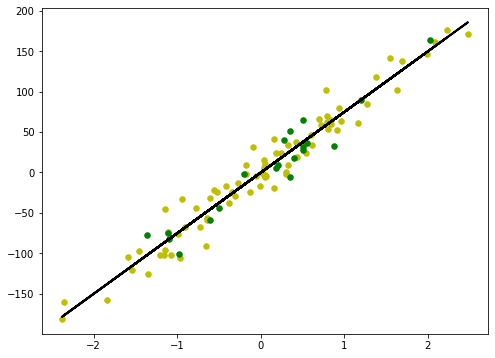

In [33]:
# best fit line visualization
y_pred_line = reg.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color='y', s=30)
m2 = plt.scatter(X_test, y_test, color='g', marker='o', s=30)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.show()